<div align="center">
    <h2>oLIMpus tutorial: animation and lightcones</h2>
</div>


In [1]:
import os
import pickle
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import colors as cc 
import oLIMpus.analysis as a 
from matplotlib.colors import LogNorm
import matplotlib.cm as cm

from oLIMpus import CoevalBox_T21reionization, CoevalBox_percell,CoevalBox_LIM_analytical, build_lightcone, eor_colour, LIM_colour_1, LIM_colour_2, plot_lightcone

In [2]:
def get_box_slices(z, Lbox, Nbox, line_model, ClassyC, RSD):

    box_slices = []    

    vmin = []
    vmax = []
    cmap = []
    title = []

    _islice = 0

    box_T21 = CoevalBox_T21reionization(line_model.zeus_coeff,line_model.zeus_corr, line_model.zeus_pk,line_model.AP, line_model.CP, ClassyC,line_model.HMFcl,z,Lbox,Nbox)

    box_SFRD = CoevalBox_percell(line_model.LIM_coeff,line_model.LIM_corr,line_model.LIM_pk,line_model.zeus_coeff, line_model.LP,line_model.AP,line_model.CP,line_model.HMFcl,z,line_model.LP._R,Lbox,Nbox)

    box_OIII = CoevalBox_LIM_analytical(line_model.LIM_coeff,line_model.LIM_corr,line_model.LIM_pk,line_model.LP,z,line_model.LP._R,Lbox,Nbox, RSD=RSD)

    coeval_slice_density = box_OIII.density_box[_islice]
    coeval_slice_SFRD = box_SFRD.SFRD_box[_islice]
    coeval_slice_xHI = box_T21.xH_box[_islice]
    coeval_slice_T21 = box_T21.T21_map[_islice]
    coeval_slice_LIM_noiseless = box_OIII.Inu_box_noiseless_smooth[_islice]
    coeval_slice_LIM = box_OIII.Inu_box_smooth[_islice]
    
    ### DENSITY 
    box_slices.append(coeval_slice_density)
    cmap.append('magma')
    title.append(r'$\delta$')
    vmin.append(-0.6)
    vmax.append(0.6)

    ### SFRD
    box_slices.append(coeval_slice_SFRD)
    cmap.append('bwr')
    title.append(r'${\rm SFRD}\,[M_\odot/{\rm yr}/{\rm Mpc^3}]$')
    vmin.append(1e-3)
    vmax.append(1e0)

    ### XHI
    box_slices.append(coeval_slice_xHI)
    cmap.append('gray')
    title.append(r'$x_{\rm HI}$')
    vmin.append(0)
    vmax.append(1)

    ### T21
    box_slices.append(coeval_slice_T21)
    cmap.append(eor_colour)
    title.append(r'$T_{21}\,[{\rm mK}]$')
    vmin.append(-10)
    vmax.append(30)

    vmax_OIII = 7.
    vmax_Ha = 9.

    ### LIM 1 

    if line_model.LP.LINE == 'OIII':
        LIM_colour=LIM_colour_1
    else:
        LIM_colour=LIM_colour_2

    box_slices.append(coeval_slice_LIM_noiseless)
    cmap.append(LIM_colour)
    title.append(r'$I_{\rm %s}\,[{\rm Jy/sr}]$'%line_model.LP.LINE) 
    vmin.append(0.)
    vmax.append(0.65*np.max(coeval_slice_LIM_noiseless))

    ### LIM2
    box_slices.append(coeval_slice_LIM)
    cmap.append(LIM_colour)
    title.append(r'$I_{\rm %s}+{\rm shot\, noise}$'%line_model.LP.LINE) 
    vmin.append(0.)
    vmax.append(0.65*np.max(coeval_slice_LIM))
    
    return box_slices, cmap, title, vmin, vmax


In [4]:
ClassyC = a.runclass(a.Cosmo_Parameters_Input(**a.CosmoParams_input_fid))
OIII_model = a.run_oLIMpus('OIII',LINE_MODEL = 'Yang24', _R = 1., shot_noise= True, quadratic_lognormal=True, astromodel=0, ZMIN=5., RSD_MODE=1)

/mnt/DATA/coding/21cm/oLIMpus/oLIMpus/LIM_modeling.py:263: RuntimeWarning: divide by zero encountered in power
  L_line = 2. * N * dotM / ((dotM / SFR1)**(-alpha) + (dotM / SFR1)**beta)
/mnt/DATA/coding/21cm/oLIMpus/oLIMpus/LIM_modeling.py:265: RuntimeWarning: divide by zero encountered in log10
  log10_L = np.log10(L_line)


 60%|██████    | 6/10 [00:00<00:00,  7.04it/s]


SUCCESS: BMF converged in 6 iterations.


100%|██████████| 1/1 [00:00<00:00,  4.14it/s]


The resolution cannot be smaller than R and Lbox/Nbox
Smoothing R changed to 2.0
The resolution cannot be smaller than R and Lbox/Nbox
Smoothing R changed to 2.0


/mnt/DATA/coding/21cm/oLIMpus/oLIMpus/LIM_modeling.py:263: RuntimeWarning: divide by zero encountered in power
  L_line = 2. * N * dotM / ((dotM / SFR1)**(-alpha) + (dotM / SFR1)**beta)
/mnt/DATA/coding/21cm/oLIMpus/oLIMpus/LIM_modeling.py:265: RuntimeWarning: divide by zero encountered in log10
  log10_L = np.log10(L_line)


The resolution cannot be smaller than R and Lbox/Nbox
Smoothing R changed to 2.0


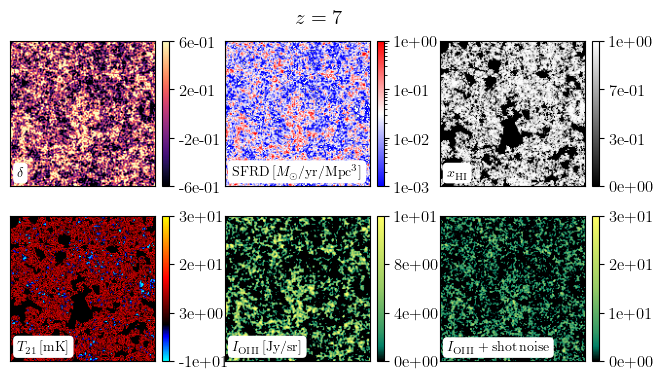

In [5]:
Lbox_fid = 300 
Nbox_fid = 150
z = 7.

box_slices_OIII, cmap, title, vmin_use, vmax_use = get_box_slices(z, Lbox_fid, Nbox_fid, OIII_model, ClassyC,1)

im = []
cbar = []
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(7, 4))
subpl = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2)]

for j in range(len(box_slices_OIII)):

    if cmap[j] == 'bwr':
        im = ax[subpl[j]].imshow(box_slices_OIII[j],extent=(0,Lbox_fid,0,Lbox_fid),cmap=cmap[j],norm = LogNorm(vmin=vmin_use[j], vmax=vmax_use[j]))

    else:
        im = ax[subpl[j]].imshow(box_slices_OIII[j],extent=(0,Lbox_fid,0,Lbox_fid),cmap=cmap[j],vmax =vmax_use[j], vmin = vmin_use[j])
    cbar = fig.colorbar(im, ax=ax[subpl[j]], fraction=0.046, pad=0.04, format="%.0e")

    if cmap[j] == 'bwr':
        xticks = [1e-3, 1e-2, 1e-1,1]  
    else:
        xticks = np.linspace(vmin_use[j],vmax_use[j],4)
    array_ticks = np.vectorize(lambda x: f"{x:.0e}")(xticks)

    cbar.set_ticks(xticks, labels = array_ticks)

    ax[subpl[j]].text(
        0.05, 0.05, title[j], 
        color='black',
        fontsize=10,
        ha='left', va='bottom',
        transform=ax[subpl[j]].transAxes,  
        bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3')  
    )
    ax[subpl[j]].set_xticks([])
    ax[subpl[j]].set_yticks([])

fig.suptitle(r'$z = %g$'%round(7.,1), fontsize=15)
fig.subplots_adjust(left=0.05, right=0.9, top=0.9, bottom=0.1, wspace=0.3)
plt.savefig('./plots_paper1/all_boxes_' + str(Lbox_fid) + ',' + str(Nbox_fid) + '.png',dpi=500,bbox_inches='tight')#,transparent=True)
plt.show()



In [5]:
CO_model = a.run_oLIMpus('CO21',LINE_MODEL = 'Yang21', _R = 5., shot_noise= True, quadratic_lognormal=True, astromodel=0, ZMIN=5., RSD_MODE=1)

In [8]:
Lbox_fid = 150 
Nbox_fid = 150
z = 6.

box_slices_OIII, cmap, title, vmin_use, vmax_use = get_box_slices(z, Lbox_fid, Nbox_fid, OIII_model, ClassyC,1)
box_slices_CO, cmap_CO, title_CO, vmin_use_CO, vmax_use_CO = get_box_slices(z, Lbox_fid, Nbox_fid, CO_model, ClassyC,1)

 60%|██████    | 6/10 [00:00<00:00,  6.34it/s]


SUCCESS: BMF converged in 6 iterations.


100%|██████████| 1/1 [00:00<00:00,  4.00it/s]
/mnt/DATA/coding/21cm/oLIMpus/oLIMpus/zeus21_local_sarah/zeus21/maps.py:94: RuntimeWarning: invalid value encountered in divide
  lognormpower = interp1d(klist,excesspower21/self.T21global**2,fill_value=0.0,bounds_error=False)
/mnt/DATA/coding/21cm/oLIMpus/oLIMpus/LIM_modeling.py:263: RuntimeWarning: divide by zero encountered in power
  L_line = 2. * N * dotM / ((dotM / SFR1)**(-alpha) + (dotM / SFR1)**beta)
/mnt/DATA/coding/21cm/oLIMpus/oLIMpus/LIM_modeling.py:265: RuntimeWarning: divide by zero encountered in log10
  log10_L = np.log10(L_line)
 60%|██████    | 6/10 [00:00<00:00,  7.32it/s]


SUCCESS: BMF converged in 6 iterations.


100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


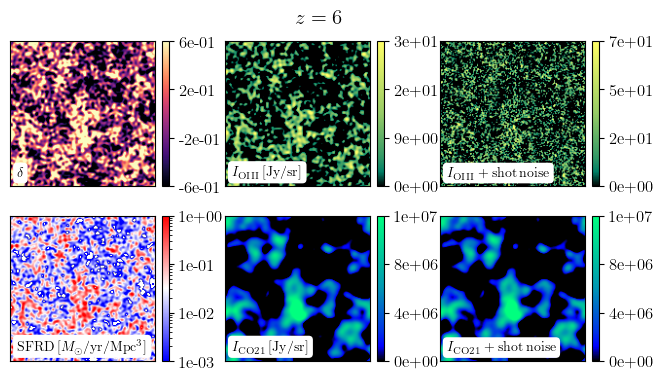

In [9]:

im = []
cbar = []
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(7, 4))
subpl = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2)]


use_boxes_OIII = [0,-2,-1,1]
for jj in range(len(use_boxes_OIII)):

    j = use_boxes_OIII[jj]
    if cmap[j] == 'bwr':
        im = ax[subpl[jj]].imshow(box_slices_OIII[j],extent=(0,Lbox_fid,0,Lbox_fid),cmap=cmap[j],norm = LogNorm(vmin=vmin_use[j], vmax=vmax_use[j]))

    else:
        im = ax[subpl[jj]].imshow(box_slices_OIII[j],extent=(0,Lbox_fid,0,Lbox_fid),cmap=cmap[j],vmax =vmax_use[j], vmin = vmin_use[j])
    cbar = fig.colorbar(im, ax=ax[subpl[jj]], fraction=0.046, pad=0.04, format="%.0e")

    if cmap[j] == 'bwr':
        xticks = [1e-3, 1e-2, 1e-1,1]  
    else:
        xticks = np.linspace(vmin_use[j],vmax_use[j],4)
    array_ticks = np.vectorize(lambda x: f"{x:.0e}")(xticks)

    cbar.set_ticks(xticks, labels = array_ticks)

    ax[subpl[jj]].text(
        0.05, 0.05, title[j], 
        color='black',
        fontsize=10,
        ha='left', va='bottom',
        transform=ax[subpl[jj]].transAxes,  
        bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3')  
    )
    ax[subpl[jj]].set_xticks([])
    ax[subpl[jj]].set_yticks([])


im = ax[subpl[-2]].imshow(box_slices_CO[-2],extent=(0,Lbox_fid,0,Lbox_fid),cmap=cmap_CO[-2],vmax =vmax_use_CO[-2], vmin = vmin_use_CO[-2])
cbar = fig.colorbar(im, ax=ax[subpl[-2]], fraction=0.046, pad=0.04, format="%.0e")

xticks = np.linspace(vmin_use_CO[-2],vmax_use_CO[-2],4)
array_ticks = np.vectorize(lambda x: f"{x:.0e}")(xticks)

cbar.set_ticks(xticks, labels = array_ticks)

ax[subpl[-2]].text(
    0.05, 0.05, title_CO[-2], 
    color='black',
    fontsize=10,
    ha='left', va='bottom',
    transform=ax[subpl[-2]].transAxes,  
    bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3')  
)
ax[subpl[-2]].set_xticks([])
ax[subpl[-2]].set_yticks([])


im = ax[subpl[-1]].imshow(box_slices_CO[-1],extent=(0,Lbox_fid,0,Lbox_fid),cmap=cmap_CO[-1],vmax =vmax_use_CO[-1], vmin = vmin_use_CO[-1])
cbar = fig.colorbar(im, ax=ax[subpl[-1]], fraction=0.046, pad=0.04, format="%.0e")

xticks = np.linspace(vmin_use_CO[-1],vmax_use_CO[-1],4)
array_ticks = np.vectorize(lambda x: f"{x:.0e}")(xticks)

cbar.set_ticks(xticks, labels = array_ticks)

ax[subpl[-1]].text(
    0.05, 0.05, title_CO[-1], 
    color='black',
    fontsize=10,
    ha='left', va='bottom',
    transform=ax[subpl[-1]].transAxes,  
    bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3')  
)
ax[subpl[-1]].set_xticks([])
ax[subpl[-1]].set_yticks([])



fig.suptitle(r'$z = %g$'%round(z,1), fontsize=15)
fig.subplots_adjust(left=0.05, right=0.9, top=0.9, bottom=0.1, wspace=0.3)
plt.savefig('./plots_paper1/oLIMpus_all_boxes_' + str(Lbox_fid) + ',' + str(Nbox_fid) + '.png',dpi=500,bbox_inches='tight')#,transparent=True)
plt.show()


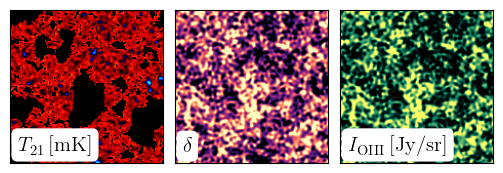

In [ ]:
im = []
cbar = []
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(6.2,2))
subpl = [0,1,2]

ids = [3,0,4]
for id in range(len(ids)):

    j = ids[id]

    if cmap[j] == 'bwr':
        im = ax[subpl[id]].imshow(box_slices_OIII[j],extent=(0,Lbox_fid,0,Lbox_fid),cmap=cmap[j],norm = LogNorm(vmin=vmin_use[j], vmax=vmax_use[j]))

    else:
        im = ax[subpl[id]].imshow(box_slices_OIII[j],extent=(0,Lbox_fid,0,Lbox_fid),cmap=cmap[j],vmax =vmax_use[j], vmin = vmin_use[j])
    #cbar = fig.colorbar(im, ax=ax[subpl[id]], fraction=0.046, pad=0.04, format="%.0e")

    if cmap[j] == 'bwr':
        xticks = [1e-3, 1e-2, 1e-1,1]  
    else:
        xticks = np.linspace(vmin_use[j],vmax_use[j],4)
    array_ticks = np.vectorize(lambda x: f"{x:.0e}")(xticks)

    #cbar.set_ticks(xticks, labels = array_ticks)

    ax[subpl[id]].text(
        0.05, 0.05, title[j], 
        color='black',
        fontsize=15,
        ha='left', va='bottom',
        transform=ax[subpl[id]].transAxes,  
        bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3')  
    )
    ax[subpl[id]].set_xticks([])
    ax[subpl[id]].set_yticks([])


# fig.suptitle(r'$z = %g$'%round(7.,1), fontsize=15)
fig.subplots_adjust(left=0.05, right=0.9, top=0.2, bottom=0.1, wspace=0.01)
plt.tight_layout()
plt.savefig('./plots_paper1/boxes_flowchart.png',dpi=300,bbox_inches='tight',transparent=True)

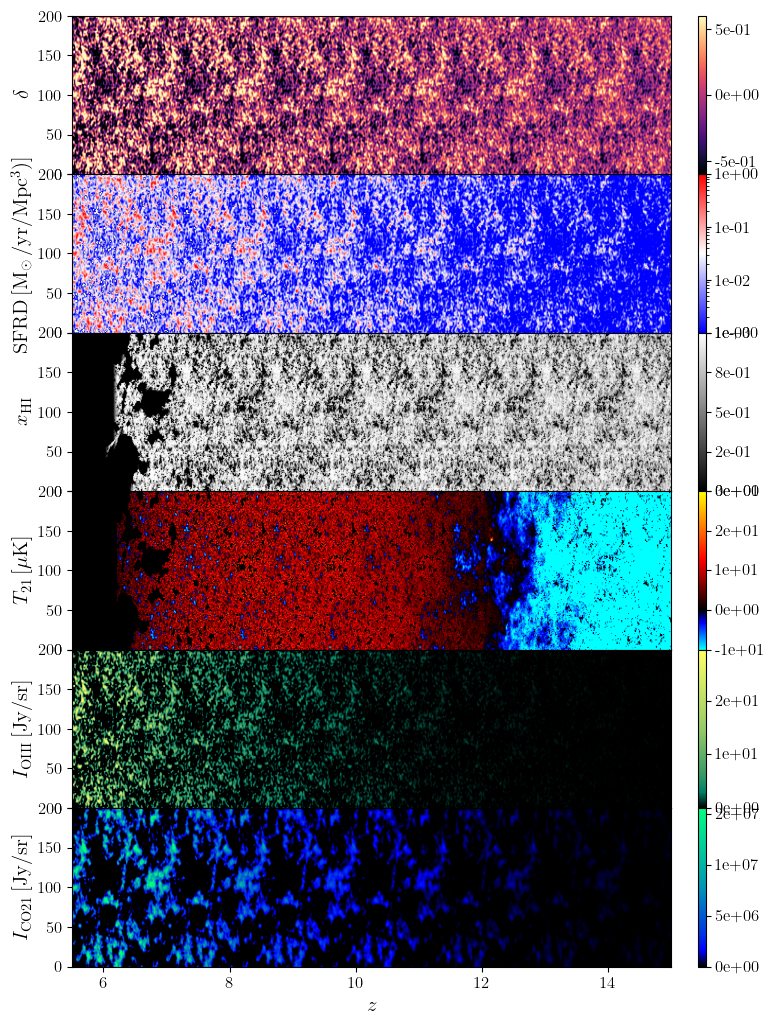

In [14]:
fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(8,10.5),gridspec_kw={'hspace': 0},sharex=True)

plot_lightcone('density',
        np.logspace(np.log10(5.5),np.log10(15.),100)[::-1],
        200, 
        150, 
        1.,
        1065, 
        True, 
        OIII_model.zeus_corr,
        OIII_model.zeus_coeff,
        OIII_model.zeus_pk,
        OIII_model.LIM_corr,
        OIII_model.LIM_coeff,
        OIII_model.LIM_pk,
        OIII_model.LP,
        OIII_model.AP, 
        OIII_model.CP,
        OIII_model.HMFcl,
        ClassyC,
        fig=fig,
        ax=ax[0],
        RSD=1
)

plot_lightcone('SFRD',
        np.logspace(np.log10(5.5),np.log10(15.),100)[::-1],
        200, 
        150, 
        1.,
        1065, 
        True, 
        OIII_model.zeus_corr,
        OIII_model.zeus_coeff,
        OIII_model.zeus_pk,
        OIII_model.LIM_corr,
        OIII_model.LIM_coeff,
        OIII_model.LIM_pk,
        OIII_model.LP,
        OIII_model.AP, 
        OIII_model.CP,
        OIII_model.HMFcl,
        ClassyC,
        fig=fig,
        ax=ax[1],
        RSD=1
)
plot_lightcone('xHI',
        np.logspace(np.log10(5.5),np.log10(15.),100)[::-1],
        200, 
        150, 
        1.,
        1065, 
        True, 
        OIII_model.zeus_corr,
        OIII_model.zeus_coeff,
        OIII_model.zeus_pk,
        OIII_model.LIM_corr,
        OIII_model.LIM_coeff,
        OIII_model.LIM_pk,
        OIII_model.LP,
        OIII_model.AP, 
        OIII_model.CP,
        OIII_model.HMFcl,
        ClassyC,
        fig=fig,
        ax=ax[2],
        RSD=1
)
plot_lightcone('T21',
        np.logspace(np.log10(5.5),np.log10(15.),100)[::-1],
        200, 
        150, 
        1.,
        1065, 
        True, 
        OIII_model.zeus_corr,
        OIII_model.zeus_coeff,
        OIII_model.zeus_pk,
        OIII_model.LIM_corr,
        OIII_model.LIM_coeff,
        OIII_model.LIM_pk,
        OIII_model.LP,
        OIII_model.AP, 
        OIII_model.CP,
        OIII_model.HMFcl,
        ClassyC,
        fig=fig,
        ax=ax[3],
        RSD=1
)

plot_lightcone('LIM',
        np.logspace(np.log10(5.5),np.log10(15.),100)[::-1],
        200, 
        150, 
        1.,
        1065, 
        True, 
        OIII_model.zeus_corr,
        OIII_model.zeus_coeff,
        OIII_model.zeus_pk,
        OIII_model.LIM_corr,
        OIII_model.LIM_coeff,
        OIII_model.LIM_pk,
        OIII_model.LP,
        OIII_model.AP, 
        OIII_model.CP,
        OIII_model.HMFcl,
        ClassyC,
        fig=fig,
        ax=ax[4],
        RSD=1,
        include_label = 'OIII'
)

plot_lightcone('LIM',
        np.logspace(np.log10(5.5),np.log10(15.),100)[::-1],
        200, 
        150, 
        5.,
        1065, 
        True, 
        CO_model.zeus_corr,
        CO_model.zeus_coeff,
        CO_model.zeus_pk,
        CO_model.LIM_corr,
        CO_model.LIM_coeff,
        CO_model.LIM_pk,
        CO_model.LP,
        CO_model.AP, 
        CO_model.CP,
        CO_model.HMFcl,
        ClassyC,
        fig=fig,
        ax=ax[5],
        RSD=1,
        include_label = 'CO'
)

plt.tight_layout(h_pad=0.1)
plt.savefig('./plots_paper1/lightcones_' + str(200) + ',' + str(200) + '.png',dpi=500,bbox_inches='tight')#,transparent=True)


In [11]:
2*np.pi/100

0.06283185307179587